Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file. 

In [1]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("avocado.csv")

In [3]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


extracted the file in the system and recalled from jupyter. df shows the data in the file. Our data has 18249 rows and 14 columns

Now as per our given problem statement we see that Avergae Price is the column which needs to be predicted making it our label. Since the data present in our label is in continous format this turns out to be a Regression problem!

Also the feature columns that we have are not all in numerical format and while building our machine learning model object datatypes are not acceptable.



In [4]:
df.drop("Unnamed: 0", axis=1, inplace=True)


In [6]:
df.shape

(18249, 13)

dropped the unnamed column and checked the shape of our data. Now it has 13 columns

In [8]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

Here we are taking a look at all the columns that are present in our dataset

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


So, our dataset has mixed data types. We don't have null values. We have 9 float, 1 integar and 3 object data types

In [14]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

There's no null value in our dataset

In [15]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


tried to see the data but a few coulmns are missing and the data looks messed. Let'me try transpose

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65
year,18249.0,2016.147899,9.399385e-01,2015.00,2015.00,2016.00,2017.00,2018.00


better now. The data shows no missing values (count column), presence of '0' can be seen in a few columns. Might be valid as the data is about sales and units.

In [17]:
df.nunique()


Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

All the unique values present in each column are segregated and listed here. This gives us an insight on how many categorical options like type and year are present and how many simply have continous data present in them.



In [18]:
df.skew()


AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

The acceptable range for skewness is between +/-0.5. And we see almost all feature columns with skewness for now. Once we have processed the data further we may check for the skewness details again and if it still persists then we will need to treat it accordingly.



In [19]:
df['Year'], df['Month'], df['Day'] = df['Date'].str.split('-').str
df.drop(columns=['Date','year'], inplace=True)
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12,06
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,2018,02,04
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,2018,01,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,2018,01,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,2018,01,14


Separating the Date column into 3 columns named as the Year, Month and Day option so that we can remove 'Date' the object datatype column and year that is already present in Date so we are avoiding duplicate columns.

df['Year']=df['Year'].astype(int)
df['Month']=df['Month'].astype(int)
df['Date']=df['Day'].astype(int)
df.drop(columns=['Day'], inplace=True)
df

Now our data has been converted to int and float only. Now we can visuaise and proceed for Model building

# Visualization


checking count plot for number variations in our features

conventional    9126
organic         9123
Name: type, dtype: int64


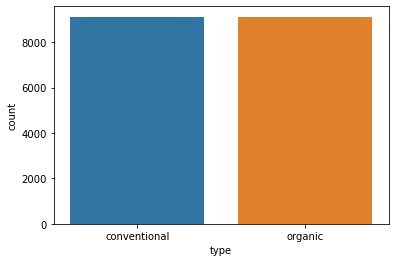

In [21]:
print(df['type'].value_counts())
sns.countplot(x='type', data=df)
plt.show()

In the "type" column we have data points for conventional and organic avacados.



2017    5722
2016    5616
2015    5615
2018    1296
Name: Year, dtype: int64


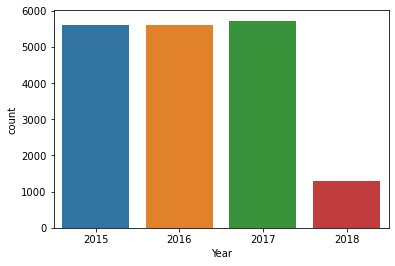

In [23]:
print(df['Year'].value_counts())
sns.countplot(x='Year', data=df)
plt.show()

datapoints are very less in 2018 compared to the one's in 2015, 2016 and 2017.



1     1944
3     1836
2     1728
5     1512
7     1512
10    1512
4     1404
8     1404
11    1404
12    1403
9     1296
6     1294
Name: Month, dtype: int64


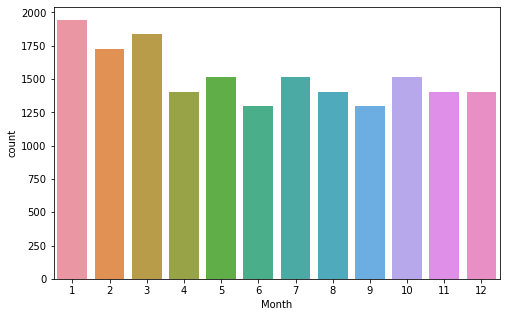

In [24]:
print(df['Month'].value_counts())
plt.figure(figsize=(8,5))
sns.countplot(x='Month', data=df)
plt.show()

In the "Month" column we can see the least datapoints in the month of June that is number 6 and the highest value concentration is present in the month of January that is number 1.

11    756
4     756
18    755
25    755
8     648
12    648
24    648
1     648
26    648
22    648
5     648
19    648
3     648
15    648
17    648
10    648
27    540
28    540
7     540
14    540
29    540
21    540
20    540
13    540
6     539
30    432
16    432
9     432
23    432
2     432
31    432
Name: Date, dtype: int64


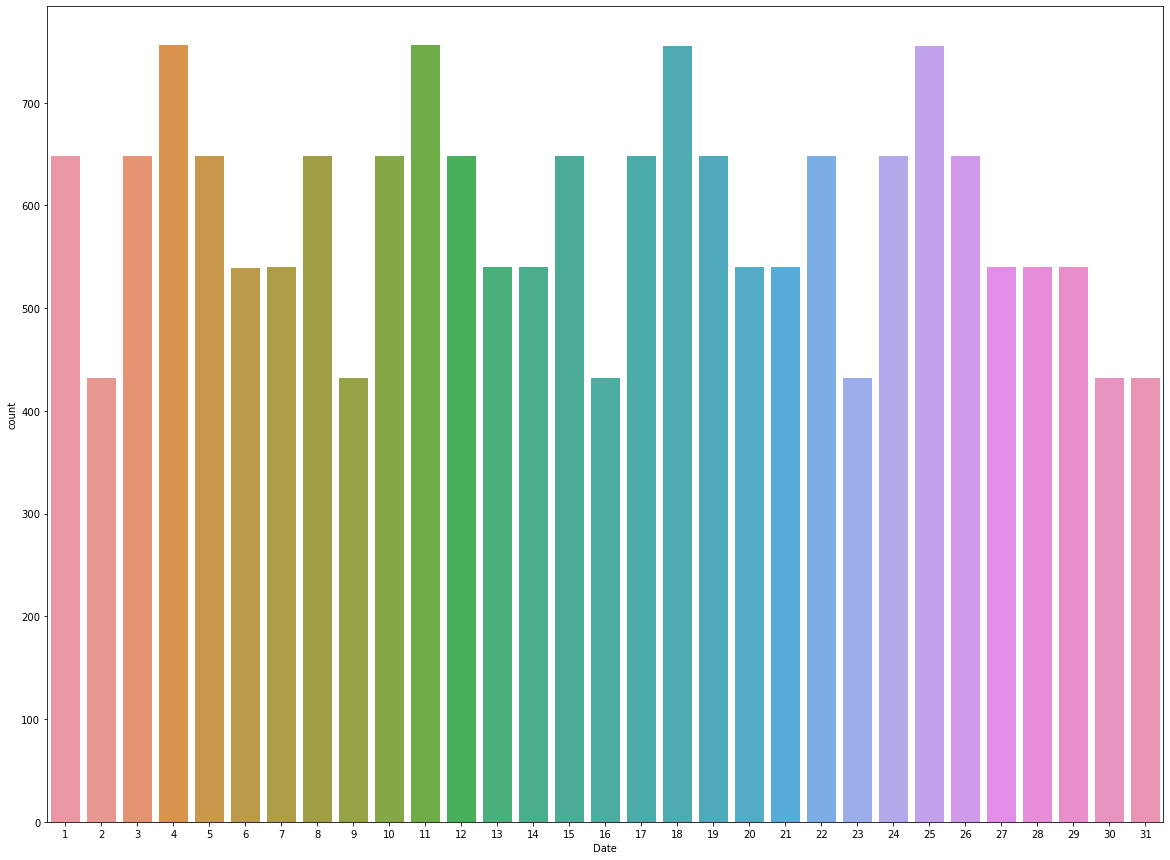

In [25]:
print(df['Date'].value_counts())
plt.figure(figsize=(20,15))
sns.countplot(x='Date', data=df)
plt.show()

n the "Date" column we can see multiple date with highest and lowest datapoint concentration. Like in the highest values we have dates 11 and 4 while for lowest values we have dates 30, 16, 9, 23, 2 and 31.

Orlando                338
TotalUS                338
SanFrancisco           338
Houston                338
Indianapolis           338
DallasFtWorth          338
Boston                 338
CincinnatiDayton       338
Louisville             338
Spokane                338
Nashville              338
Columbus               338
HarrisburgScranton     338
GrandRapids            338
California             338
HartfordSpringfield    338
SanDiego               338
MiamiFtLauderdale      338
LasVegas               338
Pittsburgh             338
Southeast              338
SouthCentral           338
Denver                 338
GreatLakes             338
Roanoke                338
Midsouth               338
Philadelphia           338
PhoenixTucson          338
SouthCarolina          338
RichmondNorfolk        338
Atlanta                338
Detroit                338
West                   338
StLouis                338
Boise                  338
Syracuse               338
NorthernNewEngland     338
R

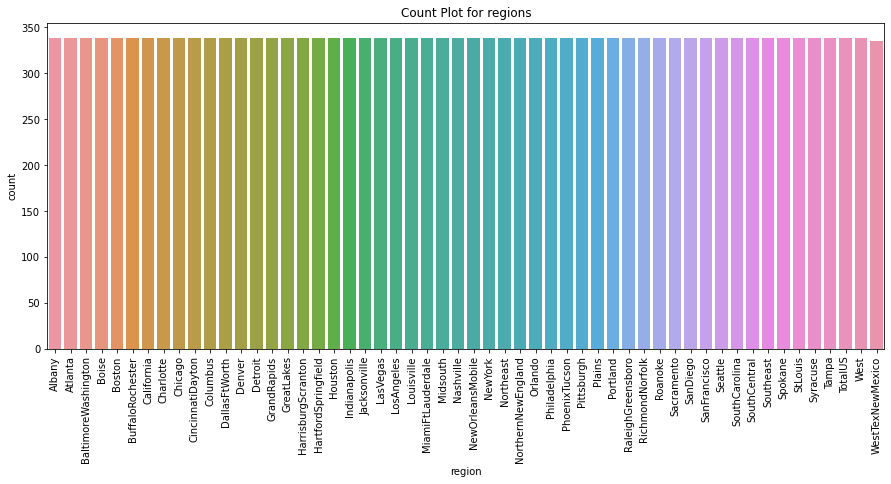

In [26]:
print(df['region'].value_counts())
plt.figure(figsize=(15,6))
sns.countplot(df['region'], data=df)
plt.title(f'Count Plot for regions')
plt.xticks(rotation=90)
plt.show()

In the "region" column we can see that the data points for almost all the values are same except WestTexNewMexico region which is a bit less than the others present in the column.

<Figure size 1080x720 with 0 Axes>

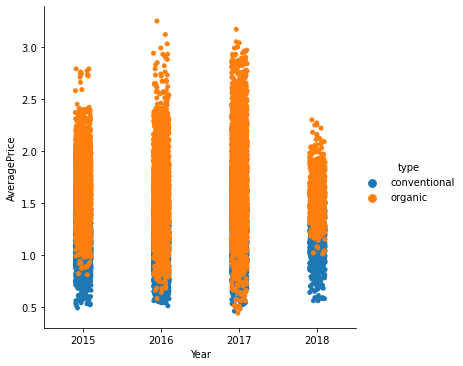

In [27]:
plt.figure(figsize=(15,10))
sns.catplot(x="Year", y="AveragePrice", hue="type", data=df)
plt.show()

In the above categorical plot we see the Average Price information as per year and how conventional and organic types were sold. We can see that organic types are always priced higher than the conventional one's since organic farming requires lots of efforts, time and method to grow avacados that yield lesser when compared to conventional ways by using chemical fertilizers.

<Figure size 1080x720 with 0 Axes>

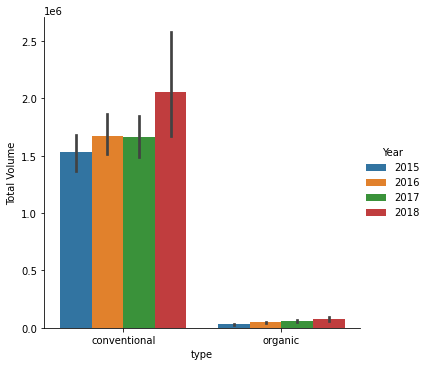

In [28]:
plt.figure(figsize=(15,10))
sns.catplot(x="type", y="Total Volume", hue="Year", kind="bar", data=df)
plt.show()

In the above bar plot we see that the Total Volume for conventional type were high in all 4 years when compared to it's organic counterparts.



<Figure size 1080x720 with 0 Axes>

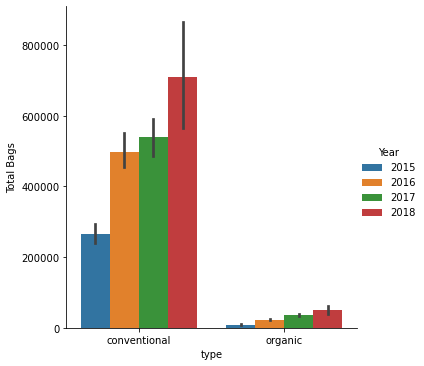

In [29]:
plt.figure(figsize=(15,10))
sns.catplot(x="type", y="Total Bags", hue="Year", data=df, kind="bar")
plt.show()

In the above bar plot we see that since the Total Volume was always high for conventional types being sold therefore the usage of bags was higher for conventional types over the organic ones. Therefore we see that Total Bags is high adn specially highest in 2018 for conventional avacados just like the Total Volume that was sold being directly proportional with each other.

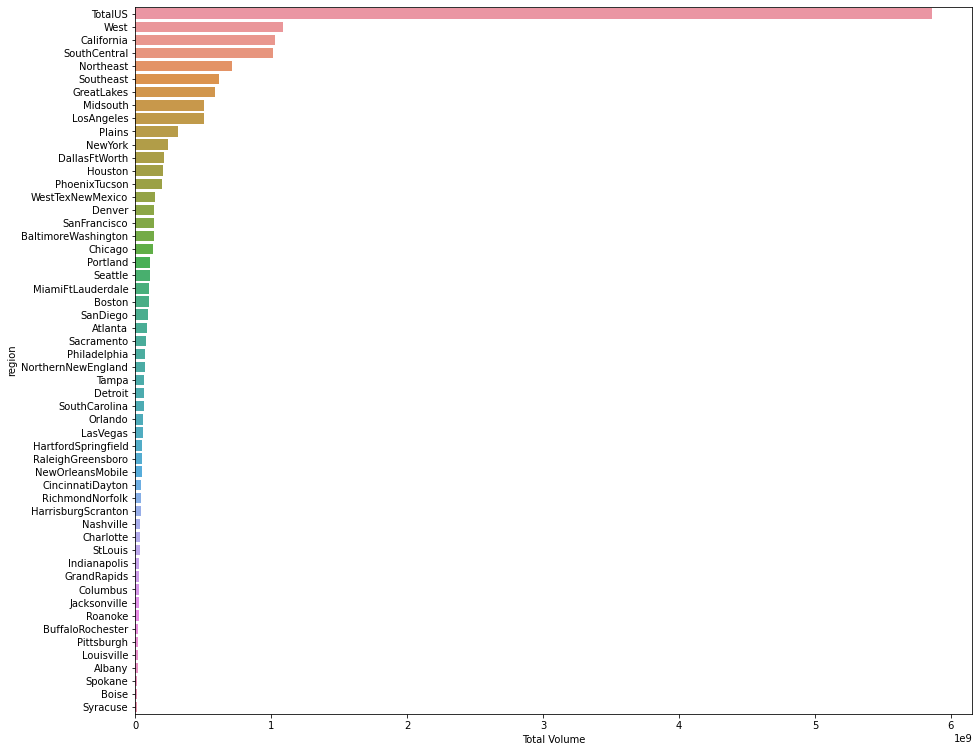

In [30]:
region = df.groupby('region')['Total Volume'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(15,13))
sns.barplot(x=region["Total Volume"], y=region["region"], data=df)
plt.show()

In the above bar plot we can see a sorted number of Total Volume of avacados sold from each and every region. Therefore when compared to the Total US area per region values are lesser but we can see tha major contributors in region are West, California, South Central, North East, South East, Great Lakes, Mid South, Los Angeles, Plains, New York and so forth.

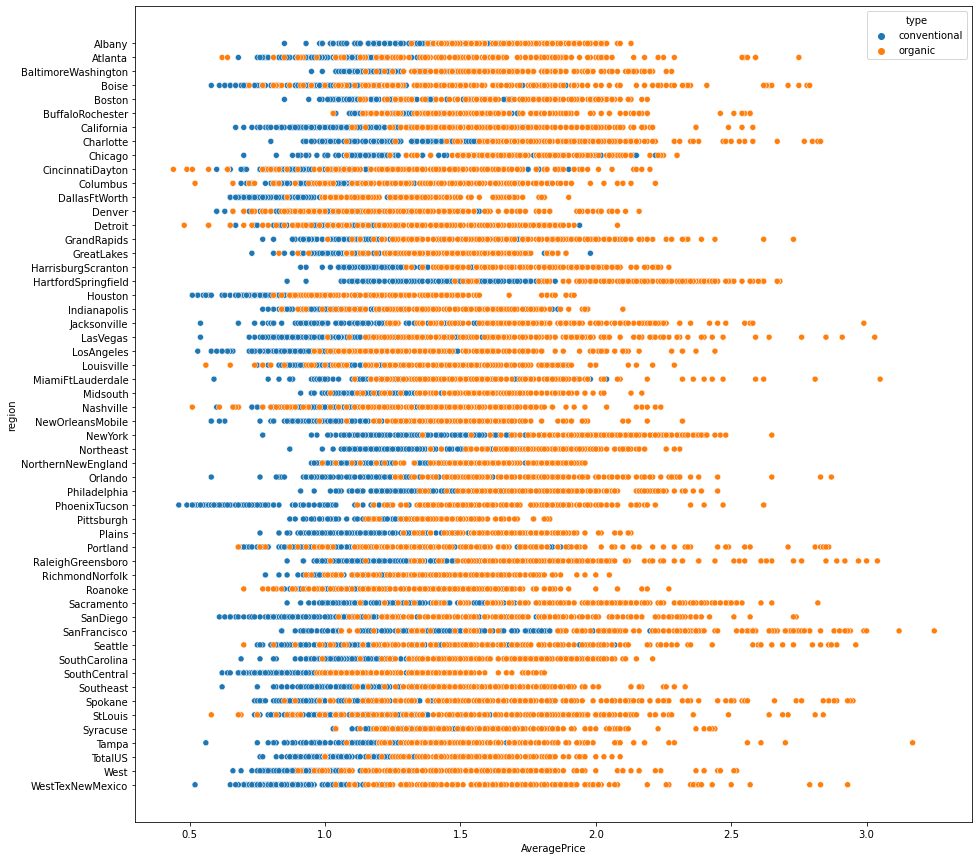

In [31]:
plt.figure(figsize=(15,15))
sns.scatterplot(x='AveragePrice', y='region', hue='type', data=df)
plt.show()

In the above scatter plot that holds data between Region vs Average Price we can see clearly how organic avacados are priced way higher than it's conventional counterparts in each and every region.

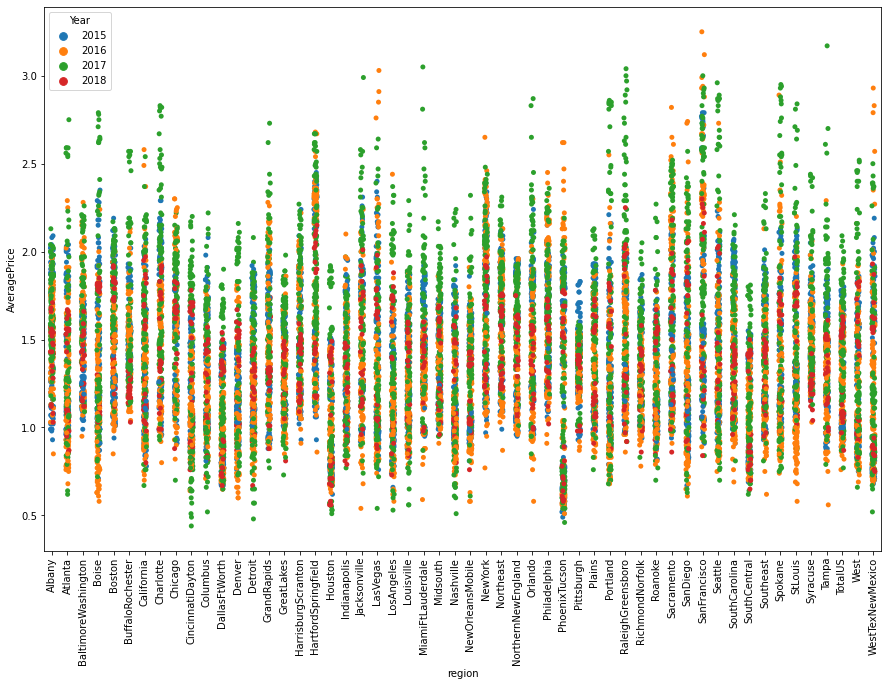

In [32]:
plt.figure(figsize=(15,10))
sns.stripplot(x='region', y='AveragePrice', hue="Year", data=df)
plt.xticks(rotation=90)
plt.show()

In the above strip plot we see the Average Price of avacodos over all the regions in all 4 years. We can see that in years 2016 and 2017 the average prices were way higher than in the years 2015 and 2018.

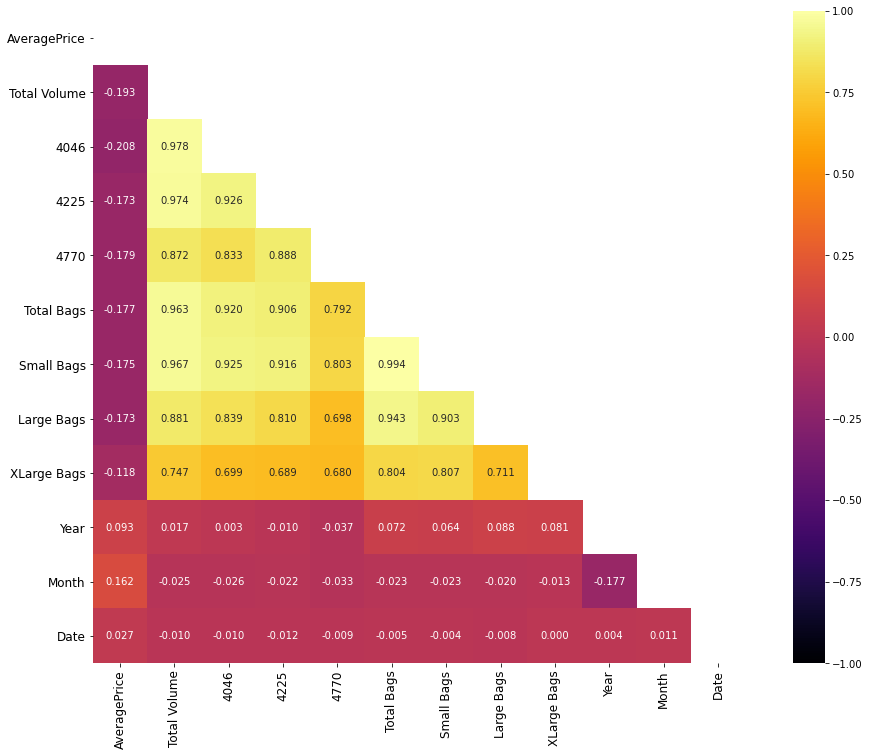

In [33]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(17,12))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="inferno", mask=upper_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

We generated a pairplot for all our features and label column but it has turned out to be very tiny to be visible properly hence we will take help of a heatmap and understand the correlation details.

From the above heatmap we undertand that there is multicolinearity present in our feature columns. There are 2 types of correlation namely Positive correlation when a correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together and Negative correlation when a correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

Here we notice that columns PLU 4046, PLU 4225 and PLU 4770 are all product codes that comprise the Total Volume. Similarly, the columns Small Bags, Large Bags, Extra Large Bags all comprise the Total Bags. Therefore to sort out the multicolinearity concern we can drop the unnecessary columns.

In [34]:
df.drop(["4046", "4225", "4770", "Small Bags", "Large Bags", "XLarge Bags"], axis=1, inplace=True)


# Encoding

In [35]:
oe = OrdinalEncoder()
df['region']=oe.fit_transform(df['region'].values.reshape(-1,1))
df['type']=oe.fit_transform(df['type'].values.reshape(-1,1))
df

,AveragePrice,Total Volume,Total Bags,type,region,Year,Month,Date
0,1.33,64236.62,8696.87,0.0,0.0,2015,12,27
1,1.35,54876.98,9505.56,0.0,0.0,2015,12,20
2,0.93,118220.22,8145.35,0.0,0.0,2015,12,13
3,1.08,78992.15,5811.16,0.0,0.0,2015,12,6
4,1.28,51039.60,6183.95,0.0,0.0,2015,11,29
...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,13498.67,1.0,53.0,2018,2,4
18245,1.71,13888.04,9264.84,1.0,53.0,2018,1,28
18246,1.87,13766.76,9394.11,1.0,53.0,2018,1,21
18247,1.93,16205.22,10969.54,1.0,53.0,2018,1,14


Using the ordinal encoding method we have changed the object datatype columns into numeric values as machine learning models cannot process object data types.



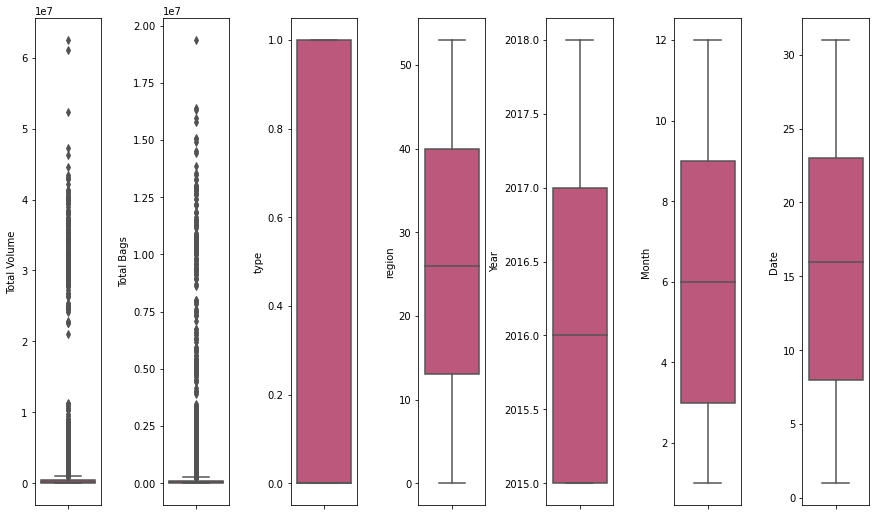

In [36]:
fig, ax = plt.subplots(ncols=7, nrows=1, figsize=(12,7))
index = 0
features = df.drop("AveragePrice", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="plasma")
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

In the above box plot we see some outliers present in our feature columns "Total Volume" and "Total Bags" so we shall treat it with the usage of zscore.



In [37]:
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (18249, 8)
Shape of the dataframe after removing outliers:  (17931, 8)
Percentage of data loss post outlier removal:  1.7425612362321221


Using the Z score method to remove any outlier that we could afford to lose from our original dataset. I see that since there were not many data points removed our new dataset would still have outlier traces but I would like to retain them.



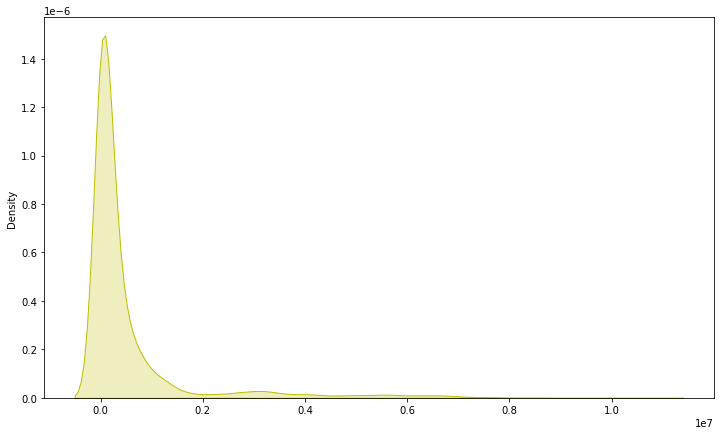

In [38]:
plt.figure(figsize=(12,7))
sns.distplot(x=df["Total Volume"], hist=False, color="y", kde_kws={"shade": True})
plt.show()

We see right skewness in the column Total Volume that had outliers too.



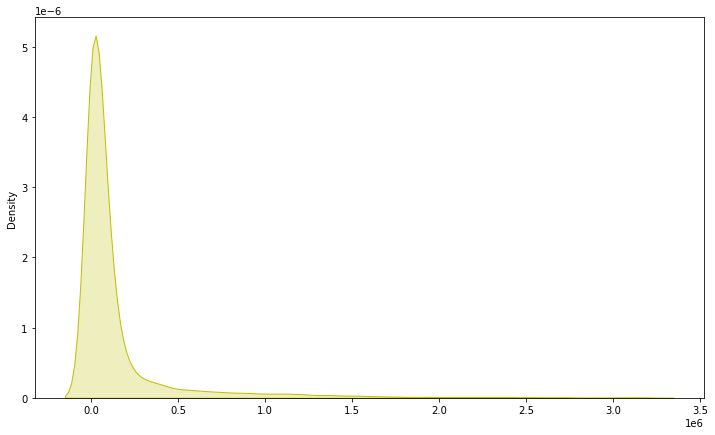

In [39]:
plt.figure(figsize=(12,7))
sns.distplot(x=df["Total Bags"], hist=False, color="y", kde_kws={"shade": True})
plt.show()

We see right skewness in the column Total Volume that had outliers too.



# Using Log Transform to fix skewness


In [40]:
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

I have applied Log Transformation on our columns to ensure that we do not have skewness in our dataset.



In [41]:
df.skew()


AveragePrice    0.388855
Total Volume   -0.024234
Total Bags     -0.334742
type           -0.005912
region          0.014808
Year            0.225227
Month           0.114771
Date            0.014381
dtype: float64

# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label


In [42]:
X = df.drop('AveragePrice', axis=1)
Y = df['AveragePrice']

bifurcating the dataset into features and labels where X represents all the feature columns and Y represents the target label column



# Feature Scaling


In [43]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head(10)

,Total Volume,Total Bags,type,region,Year,Month,Date
0,-0.090582,-0.493196,-1.00296,-1.694204,-1.215795,1.650340,1.291781
1,-0.161393,-0.452528,-1.00296,-1.694204,-1.215795,1.650340,0.493909
2,0.183695,-0.523161,-1.00296,-1.694204,-1.215795,1.650340,-0.303964
3,0.002395,-0.677598,-1.00296,-1.694204,-1.215795,1.650340,-1.101837
4,-0.193989,-0.649161,-1.00296,-1.694204,-1.215795,1.367566,1.519745
5,-0.152446,-0.613603,-1.00296,-1.694204,-1.215795,1.367566,0.721872
6,0.027100,-0.513521,-1.00296,-1.694204,-1.215795,1.367566,-0.076001
7,0.148946,-0.603766,-1.00296,-1.694204,-1.215795,1.367566,-0.873873
8,0.107584,-0.369872,-1.00296,-1.694204,-1.215795,1.367566,-1.671746
9,-0.024906,-0.496942,-1.00296,-1.694204,-1.215795,1.084793,1.063818


I am scaling my feature data to ensure that there is no issue with the data biasness over a particular column instead a standardization will occur helping us in having a uniform dataset value.

# Finding best random state for building Regression Models


In [44]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(Y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.5021238214614996 on Random State 144


With the help of random state selection process we have found our lucky number to be 144 amongst 1-1000



# Creating the training and testing data sets


In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=144)


# Machine Learning Model for Regression with Evaluation Metrics


In [46]:
# Regression Model Function

def reg(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=708)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

I have built a function that splits the training and testing features and labels, then trains the model, predicts the label, calculates the RMSE score, generates the R2 score, calculates the Cross Validation score and finally finds the difference between the R2 score and Cross Validation score.

In [47]:
# Linear Regression Model

model=LinearRegression()
reg(model, X, Y)

RMSE Score is: 0.2843241073646302
R2 Score is: 47.91662124818624
Cross Validation Score: 12.299369206677364
R2 Score - Cross Validation Score is 35.61725204150888


In [48]:
# Ridge Regression

model=Ridge(alpha=1e-2, normalize=True)
reg(model, X, Y)

RMSE Score is: 0.28468212924064595
R2 Score is: 47.78537153236971
Cross Validation Score: 12.572883789963399
R2 Score - Cross Validation Score is 35.21248774240631


In [49]:
# Lasso Regression

model=Lasso(alpha=1e-2, normalize=True, max_iter=1e5)
reg(model, X, Y)

RMSE Score is: 0.39412850641568486
R2 Score is: -0.08004140738024912
Cross Validation Score: -116.71934809126752
R2 Score - Cross Validation Score is 116.63930668388727


In [50]:
# Support Vector Regression

model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model, X, Y)

RMSE Score is: 0.26282234214244793
R2 Score is: 55.49627701086188
Cross Validation Score: -17.86082034726338
R2 Score - Cross Validation Score is 73.35709735812526


In [51]:
# Decision Tree Regressor

model=DecisionTreeRegressor(criterion="poisson", random_state=111)
reg(model, X, Y)

RMSE Score is: 0.34727199177352996
R2 Score is: 22.301739279650835
Cross Validation Score: -141.40180891546768
R2 Score - Cross Validation Score is 163.70354819511851


In [52]:
# Random Forest Regressor

model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, X, Y)

RMSE Score is: 0.29985650834321037
R2 Score is: 42.0706386666038
Cross Validation Score: -17.31432341391281
R2 Score - Cross Validation Score is 59.38496208051661


In [53]:
# K Neighbors Regressor

KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
reg(model, X, Y)

RMSE Score is: 0.29924404193651327
R2 Score is: 42.307042096226475
Cross Validation Score: -11.601175895812721
R2 Score - Cross Validation Score is 53.9082179920392


In [54]:
# Gradient Boosting Regressor

model=GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
reg(model, X, Y)

RMSE Score is: 0.28246656522860747
R2 Score is: 48.59493894858941
Cross Validation Score: -19.545186504819114
R2 Score - Cross Validation Score is 68.14012545340853


In [55]:
# Ada Boost Regressor

model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
reg(model, X, Y)

RMSE Score is: 0.2731855113353641
R2 Score is: 51.91749271525534
Cross Validation Score: -2.2062818905596826
R2 Score - Cross Validation Score is 54.12377460581502


In [56]:
# XGB Regressor

model=XGBRegressor()
reg(model, X, Y)

RMSE Score is: 0.13156329541646664
R2 Score is: 88.84829511848271
Cross Validation Score: 39.48804192771808
R2 Score - Cross Validation Score is 49.36025319076463


# Hyper parameter tuning on the best ML Model


In [57]:
# Choosing XGB Regressor

fmod_param = {'n_estimators' : [200, 400, 600],
              'gamma' : [2.0, 3.0, 4.0],
              'max_depth' : [4, 6, 8],
              'n_jobs' : [-2, -1, 1]
             }

In [58]:
GSCV = GridSearchCV(XGBRegressor(), fmod_param, cv=5)


In [65]:
GSCV.fit(X_train,Y_train)


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
       

In [66]:
GSCV.best_params_


{'gamma': 2.0, 'max_depth': 8, 'n_estimators': 200, 'n_jobs': -2}

In [67]:
GSCV.best_score_


0.7423465479786919

In [68]:
Final_Model = XGBRegressor(gamma=2.0, max_depth=8, n_estimators=200, n_jobs=-2)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(Y_test, fmod_pred)*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: 78.88427707762189


# Saving the best model


In [69]:
filename = "FinalModel_E02.pkl"
joblib.dump(Final_Model, filename)

['FinalModel_E02.pkl']

Finally, saving my best regression model using the joblib library.

